In [1]:
# Name    : Aprilyanto Setiyawan Siburian
# NIM     : 24060121120022
# Dataset : National Health and Nutrition Health Survey 2013-2014 (NHANES) Age Prediction Subset
# Link    : https://archive.ics.uci.edu/dataset/887/national+health+and+nutrition+health+survey+2013-2014+(nhanes)+age+prediction+subset

In [2]:
# Menginstal paket ucimlrepo
# ucimlrepo adalah sebuah paket Python untuk memudahkan impor dataset dari Repositori Pembelajaran Mesin UC Irvine ke dalam skrip dan notebook.

!pip3 install -U ucimlrepo

In [3]:
# Mengimpor fungsi dan pustaka yang diperlukan

from ucimlrepo import fetch_ucirepo               # Mengimpor fungsi fetch_ucirepo dari paket ucimlrepo. Fungsi ini digunakan untuk mengunduh datasets dari UC Irvine Machine Learning Repository.
import pandas as pd                               # Mengimpor paket pandas sebagai pd. pandas adalah library Python yang populer untuk bekerja dengan data.
import numpy as np                                # Mengimpor paket numpy sebagai np. numpy adalah library Python yang menyediakan struktur data dan rutinitas matematis yang efisien.
from sklearn.preprocessing import MinMaxScaler    # Mengimpor kelas MinMaxScaler dari submodul preprocessing dalam paket sklearn. Kelas ini digunakan untuk melakukan scaling data numerik ke rentang tertentu (misalnya, 0-1).
from matplotlib import pyplot as plt              # Mengimpor submodul pyplot dari paket matplotlib sebagai plt. Submodul ini digunakan untuk membuat plot dan visualisasi data.
from sklearn.preprocessing import StandardScaler  # Mengimpor kelas StandardScaler dari submodul preprocessing dalam paket sklearn. Kelas ini digunakan untuk melakukan standardisasi data numerik (mengurangi mean dan membagi dengan standar deviasi).
from sklearn.preprocessing import LabelEncoder    # Mengimpor kelas LabelEncoder dari submodul preprocessing dalam paket sklearn untuk melakukan label encoding, yaitu teknik untuk mengonversi data kategorikal ke data numerik.
from sklearn.decomposition import PCA             # Mengimpor kelas PCA dari submodul decomposition dalam paket sklearn. Kelas ini digunakan untuk melakukan Principal Component Analysis (PCA) pada data.
import matplotlib.pyplot as plt                   # Mengimpor submodul pyplot dari paket matplotlib sebagai plt, untuk membuat plot dan visualisasi data (diimpor dua kali, kemungkinan karena alasan tertentu).
import seaborn as sns                             # Mengimpor paket seaborn sebagai sns. seaborn adalah library Python yang dibangun di atas matplotlib untuk membuat visualisasi data yang lebih estetis dan informatif.
%matplotlib inline
# %matplotlib inline digunakan dalam IPython Notebook untuk menampilkan plot secara inline dalam notebook.

# Mengambil dataset National Health and Nutrition Health Survey 2013-2014 (NHANES) Age Prediction Subset
url = "https://archive.ics.uci.edu/static/public/887/data.csv"
names = ['ID', 'age_group', 'age', 'gender', 'activity_level', 'bmi', 'blood_glucose', 'is_diabetic', 'ogtt', 'insulin_levels']
# Dataset ini memiliki 10 atribut dan perlu diubah namanya agar mudah dibaca menggunakan sebuah array nama.

# Membaca file csv dari URL dan menghasilkan DataFrame melalui fungsi read_csv
dataframe = pd.read_csv(url)

# Mengganti nama kolom dengan array nama-nama
dataframe.rename(columns={'SEQN': names[0], 'age_group': names[1], 'RIDAGEYR': names[2], 'RIAGENDR': names[3], 'PAQ605': names[4], 'BMXBMI': names[5], 'LBXGLU': names[6], 'DIQ010': names[7], 'LBXGLT': names[8], 'LBXIN': names[9]}, inplace=True)


In [4]:
# Menampilkan 5 baris pertama
dataframe.head()

,ID,age_group,age,gender,activity_level,bmi,blood_glucose,is_diabetic,ogtt,insulin_levels
0,73564.0,Adult,61.0,2.0,2.0,35.7,110.0,2.0,150.0,14.91
1,73568.0,Adult,26.0,2.0,2.0,20.3,89.0,2.0,80.0,3.85
2,73576.0,Adult,16.0,1.0,2.0,23.2,89.0,2.0,68.0,6.14
3,73577.0,Adult,32.0,1.0,2.0,28.9,104.0,2.0,84.0,16.15
4,73580.0,Adult,38.0,2.0,1.0,35.9,103.0,2.0,81.0,10.92


In [5]:
# Karena kolom "age_group" bersifat kategorikal dan berisi nilai string, kita perlu mengodekan kolom tersebut dari Adult dan Senior masing-masing menjadi 0 dan 1.
label_encoder = LabelEncoder()
dataframe['age_group'] = label_encoder.fit_transform(dataframe['age_group'])

In [6]:
# Melakukan langkah untuk persiapan data sebelum menerapkan analisis PCA (Principal Component Analysis)
features = ['ID', 'age', 'gender', 'activity_level', 'bmi', 'blood_glucose', 'is_diabetic', 'ogtt', 'insulin_levels']
x = dataframe.loc[:, features].values
y = dataframe.loc[:,['age_group']].values
x = StandardScaler().fit_transform(x)

x menyimpan nilai fitur, sedangkan y menyimpan nilai label. x akan digunakan sebagai input untuk PCA, sementara y akan digunakan untuk memberikan warna pada plot scatter.

StandardScaler digunakan untuk mengubah setiap fitur sehingga memiliki rata-rata nol dan deviasi standar satu. Hal ini diperlukan karena PCA dapat dipengaruhi oleh skala data. Dengan menskalakan data, dapat dipastikan bahwa setiap fitur berkontribusi sebanding terhadap hasil PCA.

Langkah-langkah ini dilakukan untuk bersiap untuk melakukan analisis PCA dengan mengambil fitur yang relevan, menyusunnya ke dalam matriks x, dan kemudian menskalakan data menggunakan StandardScaler agar sesuai dengan asumsi PCA. Selanjutnya, hasil PCA akan digunakan untuk visualisasi dalam plot scatter 2D.

In [12]:
# Menerapkan PCA
pca = PCA(n_components=2)
x_pca = pca.fit_transform(x)

# Membuat DataFrame baru dari hasil PCA
pca_df = pd.DataFrame(data=x_pca, columns=['PC1', 'PC2'])

# Menggabungkan dengan label untuk analisis lebih lanjut
final_df = pd.concat([pca_df, dataframe[['age_group']]], axis=1)

# Menampilkan hasil
print(final_df.head(50))

         PC1       PC2  age_group
0   1.595436 -0.276381          0
1  -1.673797 -0.058774          0
2  -1.629753 -0.439048          0
3  -0.038629 -0.765270          0
4   0.069108 -1.254831          0
5  -0.122994  0.785526          0
6   1.539414 -1.495169          0
7   2.000491 -0.857231          0
8   1.085260 -0.695171          1
9  -0.729584 -0.068142          0
10 -0.161334 -0.395055          0
11 -0.921578 -0.853251          0
12 -0.045679  1.265442          1
13  0.383408 -0.410830          0
14  4.191306  1.394527          1
15  0.786576  0.987004          1
16  0.677181 -0.601064          0
17 -0.562907 -0.025996          0
18  4.345387 -1.999729          1
19 -1.600285  0.063298          0
20 -0.188481 -0.680692          0
21 -0.563992 -0.339512          0
22  0.690017 -0.148263          0
23  0.475532 -1.332558          0
24  0.071978 -1.221216          0
25 -1.416107 -0.227052          0
26  1.484670 -0.034144          0
27 -0.920030  0.937877          1
28 -1.963676 -

Kode di atas melakukan analisis Principal Component Analysis (PCA) pada data yang sudah disiapkan sebelumnya. Pada bagian ini, dilakukan analisis Principal Component Analysis (PCA) untuk mengurangi dimensi data yang telah disiapkan sebelumnya. PCA merupakan teknik reduksi dimensi yang bertujuan untuk mengidentifikasi pola utama atau komponen utama dalam data.

Pertama, objek PCA dengan dua komponen utama ditentukan dengan menggunakan kelas PCA dari pustaka scikit-learn. Selanjutnya, data disesuaikan (fit) dan ditransformasi (transform) ke dalam ruang fitur baru yang terdiri dari dua komponen utama menggunakan metode fit_transform pada objek PCA. Hasil transformasi ini, yang mencerminkan variasi data yang paling signifikan, kemudian diorganisir ke dalam DataFrame baru dengan nama kolom 'PC1' dan 'PC2'. Data ini kemudian digabungkan dengan kolom label 'age_group' dari DataFrame asli, membentuk DataFrame akhir (final_df). Hasilnya dapat digunakan untuk analisis lebih lanjut, seperti visualisasi atau pemodelan statistik, dan 50 baris pertama dari DataFrame akhir ditampilkan untuk memberikan gambaran awal mengenai hasil PCA.

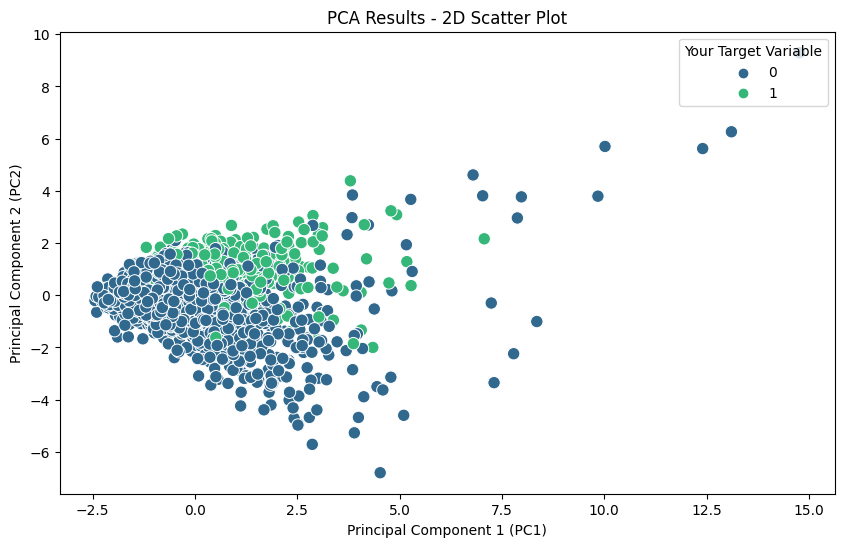

In [17]:
# Plot 2D scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC1', y='PC2', hue='age_group', data=final_df, palette='viridis', s=80)
plt.title('PCA Results - 2D Scatter Plot')
plt.xlabel('Principal Component 1 (PC1)')
plt.ylabel('Principal Component 2 (PC2)')
plt.legend(title='Your Target Variable', loc='upper right')
plt.show()

Pada kode di atas, dilakukan visualisasi hasil dari analisis Principal Component Analysis (PCA) dalam bentuk scatter plot 2D. Dengan menggunakan pustaka matplotlib dan seaborn, sebuah figur dengan ukuran (10, 6) diinisialisasi sebagai ruang untuk menampung plot. Selanjutnya, scatter plot dibuat dengan menggunakan metode `scatterplot` dari seaborn (`sns`). Posisi x dan y pada plot diatur oleh dua komponen utama hasil PCA, yaitu 'PC1' dan 'PC2'. Warna titik-titik diplot ditentukan oleh kolom label 'age_group', dengan skala warna menggunakan palet 'viridis'. Selain itu, ukuran titik-titik diatur dengan parameter `s=80`. Plot dilengkapi dengan judul, label sumbu x dan y yang menggambarkan masing-masing komponen utama, serta legenda yang menjelaskan variabel target (age_group) yang ditunjukkan oleh warna. Setelah plot selesai dikonfigurasi, `plt.show()` digunakan untuk menampilkan plot secara interaktif. Dengan visualisasi ini, dapat dilihat bagaimana data tersebar dalam ruang dua dimensi yang diproyeksikan oleh PCA, memungkinkan pemahaman yang lebih baik terhadap pola atau kelompok yang mungkin ada dalam data.

In [18]:
variance_ratio = pca.explained_variance_ratio_
total_variance_explained = np.sum(variance_ratio)

print("Variance Ratio:")
print(variance_ratio)

print("\nTotal Variance Explained:")
print(total_variance_explained)

Variance Ratio:
[0.23798753 0.14831403]

Total Variance Explained:
0.3863015663193462


Dalam kode di atas, dilakukan perhitungan rasio variasi yang dijelaskan oleh setiap komponen utama hasil analisis Principal Component Analysis (PCA). Pertama, `explained_variance_ratio_` digunakan untuk mendapatkan array yang berisi rasio variasi yang dijelaskan oleh masing-masing komponen utama. Kemudian, menggunakan fungsi NumPy `sum`, total rasio variasi dihitung dengan menjumlahkan semua nilai dalam array tersebut. Hasil perhitungan tersebut kemudian dicetak untuk memberikan informasi mengenai seberapa banyak variasi dalam data yang berhasil dijelaskan oleh dua komponen utama tersebut. Rasio variasi menyediakan gambaran tentang sejauh mana informasi asli dari data berhasil dipertahankan dalam representasi dua dimensi yang dihasilkan oleh PCA. Dengan mengevaluasi rasio variasi, dapat diketahui seberapa efektif komponen utama yang dipilih dalam merangkum karakteristik penting dari data. Semakin tinggi rasio variasi, semakin banyak informasi yang berhasil dipertahankan dalam proyeksi PCA.